In [1]:
'''
    Author - Oyesh Mann Singh
    Date - 11/30/2018
    Description 
        - Careful text preprocessing
        - Usage of word2vec
'''

import os
import sys
import time
import re
import string
import unicodecsv as csv
import unicodedata as un
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from gensim.models import Word2Vec, KeyedVectors

import pickle

C:\Users\uttam\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
'''
    Read all files into one corpus file
    Break down each sentence into new line
    Remove punctuation except selective punctuation
    Lowercase
    Replace numbers with <num>
    Do not remove stop words
    Remove '.'
'''
print()

### DO NOT RUN THIS SECTION TWICE

In [88]:
'''
    DO NOT RUN
'''
in_path = './data/aclImdb/data/'
out_file = './data/raw_corpus.txt'

# Do not remove .?!

table = dict.fromkeys(i for i in range(sys.maxunicode) 
                        if un.category(chr(i)).startswith(('P','N','S','Cf','Cn','Cc'))
                        and i != 45 and i != 46)

# Create a corpus and remove html break 
with open(out_file, 'w', encoding='utf8') as out_f:
    for root, dirs, files in os.walk(in_path, topdown=True):
        if(len(files) > 0):
            for each_file in files:
                file_path = os.path.join(root, each_file)
                fp = open(file_path, encoding='utf-8-sig').read().replace("<br />","")
                
                fp = fp.translate(table)
                
                fp = re.sub(r"(?<!\w)[-]|[-](?!\w)",'',fp)
                
                out_f.write(fp)

out_f.close()    

In [3]:
out_file = './data/raw_corpus.txt'
in_f = open(out_file, encoding='utf-8').read().lower()

In [4]:
# from nltk.corpus import gutenberg
 
# text = ""
# for file_id in gutenberg.fileids():
#     text += gutenberg.raw(file_id)

# from pprint import pprint
# from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer, PunktToken

# trainer = PunktTrainer()
# trainer.INCLUDE_ALL_COLLOCS = True

# trainer.train(text)
# tokenizer = PunktSentenceTokenizer(trainer.get_params())

In [31]:
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

In [36]:
# Test the tokenizer on a piece of text
sentences = "Mr. James Ph.D. someone told me Dr. Brown is not available today. I will try tomorrow. I am a good boy."
sentences = tokenizer.tokenize(sentences)
print(sentences)

['Mr. James Ph.D. someone told me Dr. Brown is not available today.', 'I will try tomorrow.', 'I am a good boy.']


In [39]:
def remove_period(sents):
    tokenized_sents = []
    for each_sent in sents:
        if len(each_sent) > 1 and each_sent[-1] == '.':
            tokenized_sents.append(each_sent[:-1])
        else:
            tokenized_sents.append(each_sent)
    
    return tokenized_sents

In [52]:
remove_period(sentences)

<class 'list'>


In [42]:
sent = tokenizer.tokenize(in_f)

In [55]:
print(sent[1:10])

['aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters.', 'most of us have ghosts in the closet and costners character are realized early on and then forgotten until much later by which time i did not care.', 'the character we should really care about is a very cocky overconfident ashton kutcher.', 'the problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet.', 'his only obstacle appears to be winning over costner.', 'finally when we are well past the half way point of this stinker costner tells us all about kutchers ghosts.', 'we are told why kutcher is driven to be the best with no prior inkling or foreshadowing.', 'no magic here it was all i could do to keep from turning it off an hour in.this is an example of why the majority of action films are the same.', 'generic and boring theres really nothing worth watching here.']


In [56]:
print(sent[10])

a complete waste of the then barely-tapped talents of ice-t and ice cube whove each proven many times over that they are capable of acting and acting well.


In [59]:
sent = remove_period(sent)

In [83]:
print(sent[1:10])

['aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters', 'most of us have ghosts in the closet and costners character are realized early on and then forgotten until much later by which time i did not care', 'the character we should really care about is a very cocky overconfident ashton kutcher', 'the problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet', 'his only obstacle appears to be winning over costner', 'finally when we are well past the half way point of this stinker costner tells us all about kutchers ghosts', 'we are told why kutcher is driven to be the best with no prior inkling or foreshadowing', 'no magic here it was all i could do to keep from turning it off an hour in.this is an example of why the majority of action films are the same', 'generic and boring theres really nothing worth watching here']


In [91]:
# Save clean list as a corpus
with open('./data/clean_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(str(sent))

In [61]:
'''
    Tokenize each sentence
'''
import nltk
total_sents = []

for each in sent:
    total_sents.append(each.split())

In [62]:
total_sents[1]

['aside',
 'from',
 'the',
 'terrific',
 'sea',
 'rescue',
 'sequences',
 'of',
 'which',
 'there',
 'are',
 'very',
 'few',
 'i',
 'just',
 'did',
 'not',
 'care',
 'about',
 'any',
 'of',
 'the',
 'characters']

In [63]:
'''
    Creating word2vec embeddings
'''
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec

path = get_tmpfile("./data/word2vec.model")

model = Word2Vec(total_sents, size=50, window=5, min_count=1, workers=4)
model.wv.save_word2vec_format('./data/word2vec.txt')

## Load word2vec model

In [27]:
model = KeyedVectors.load_word2vec_format('./data/word2vec.txt')

In [28]:
model.similar_by_word('movies')

[('films', 0.9444381594657898),
 ('flicks', 0.8775256276130676),
 ('comedies', 0.8527957201004028),
 ('sequels', 0.815605878829956),
 ('westerns', 0.8083510398864746),
 ('cartoons', 0.7698983550071716),
 ('classics', 0.7615748643875122),
 ('b-movies', 0.7550088167190552),
 ('shorts', 0.7373173236846924),
 ('thrillers', 0.7355096936225891)]

In [86]:
# Load clean corpus
with open('./data/clean_corpus.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [87]:
print(mynewlist[1:10])

['aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters', 'most of us have ghosts in the closet and costners character are realized early on and then forgotten until much later by which time i did not care', 'the character we should really care about is a very cocky overconfident ashton kutcher', 'the problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet', 'his only obstacle appears to be winning over costner', 'finally when we are well past the half way point of this stinker costner tells us all about kutchers ghosts', 'we are told why kutcher is driven to be the best with no prior inkling or foreshadowing', 'no magic here it was all i could do to keep from turning it off an hour in.this is an example of why the majority of action films are the same', 'generic and boring theres really nothing worth watching here']


In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def display_closestwords_tsnescatterplot(model, word='movies', topn=10):
    vector_dim = model.vector_size
    arr = np.empty((0,vector_dim), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word,topn=topn)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

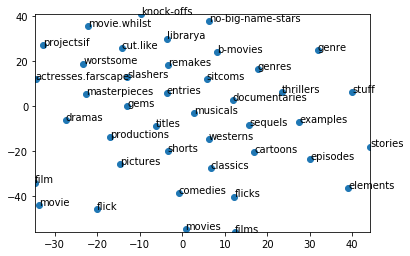

In [50]:
display_closestwords_tsnescatterplot(model, word='movies', topn=40)